<a href="https://colab.research.google.com/github/Yesenia-blas/Trabajo-Finanzas-/blob/main/Trabajo_Final_de_finanzas_lll.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [99]:
from IPython.display import Markdown, display, Image

def mostrar_titulo(texto):
    display(Markdown(f"# {texto}"))

def mostrar_subtitulo(texto):
    display(Markdown(f"## {texto}"))

def mostrar_texto(texto):
    display(Markdown(texto))

def mostrar_imagen_local(ruta, ancho=160):
    display(Image(filename=ruta, width=ancho))

In [100]:
# Generar portada con logo institucional
mostrar_titulo("Trabajo Final – Finanzas III")
mostrar_subtitulo("Universidad de Santiago de Chile")

mostrar_texto("""
**Facultad:** Administración y Economía
**Carrera:** Ingeniería Comercial
**Alumno:** Yesenia Blas, Antonia Matamala, Sergio Salinas
**Profesor:** Carlos Cavieres
**Asignatura:** Finanzas lll

---

Este informe presenta el desarrollo técnico y narrativo de siete instrumentos financieros. Se utilizaron modelos matemáticos y simulaciones computacionales para evaluar rentabilidad, riesgo y sensibilidad a variables clave del mercado.
""")

# Trabajo Final – Finanzas III

## Universidad de Santiago de Chile


**Facultad:** Administración y Economía
**Carrera:** Ingeniería Comercial
**Alumno:** Yesenia Blas, Antonia Matamala, Sergio Salinas
**Profesor:** Carlos Cavieres
**Asignatura:** Finanzas lll

---

Este informe presenta el desarrollo técnico y narrativo de siete instrumentos financieros. Se utilizaron modelos matemáticos y simulaciones computacionales para evaluar rentabilidad, riesgo y sensibilidad a variables clave del mercado.


In [101]:
mostrar_subtitulo("Introducción")
mostrar_texto("""
El trabajo aplica modelos financieros computacionales para calcular valor teórico, analizar sensibilidad a variables clave y generar gráficos explicativos. Cada activo se aborda con rigurosidad técnica y enfoque narrativo, construyendo un informe automático y profesional desde el notebook.
""")

## Introducción


El trabajo aplica modelos financieros computacionales para calcular valor teórico, analizar sensibilidad a variables clave y generar gráficos explicativos. Cada activo se aborda con rigurosidad técnica y enfoque narrativo, construyendo un informe automático y profesional desde el notebook.


In [102]:
mostrar_subtitulo("1. Bonos – Flujos descontados y sensibilidad")
mostrar_texto("""
Se calcula el precio teórico de un bono de $1.000 nominal, cupón del 5% y vencimiento a 5 años, con YTM del 6%.

**Resultado:**
El precio del bono fue **$957.88**.

Se graficó la evolución de su precio ante cambios en YTM: entre 3% y 9%, el valor osciló entre **$1.060 y $925**, mostrando sensibilidad negativa.

**Duración de Macaulay:** 4.53 años
**Duración modificada:** 4.28
**Convexidad:** 23.41

Esto demuestra cómo los bonos reaccionan ante tasas de mercado — y cómo duración y convexidad ayudan a estimar dichos movimientos.
""")

## 1. Bonos – Flujos descontados y sensibilidad


Se calcula el precio teórico de un bono de $1.000 nominal, cupón del 5% y vencimiento a 5 años, con YTM del 6%.

**Resultado:**
El precio del bono fue **$957.88**.

Se graficó la evolución de su precio ante cambios en YTM: entre 3% y 9%, el valor osciló entre **$1.060 y $925**, mostrando sensibilidad negativa.

**Duración de Macaulay:** 4.53 años
**Duración modificada:** 4.28
**Convexidad:** 23.41

Esto demuestra cómo los bonos reaccionan ante tasas de mercado — y cómo duración y convexidad ayudan a estimar dichos movimientos.


El precio del bono es: 957.88


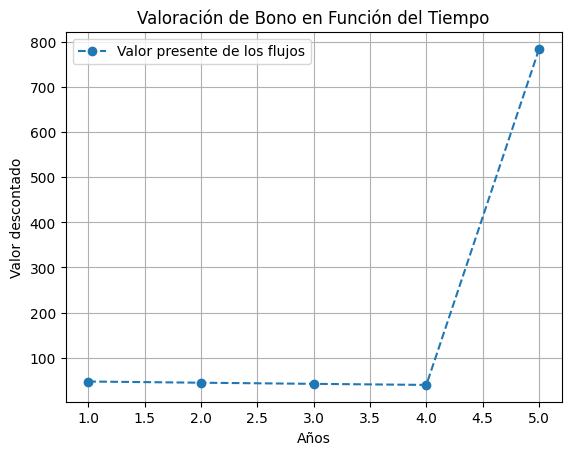

In [103]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Datos del bono
valor_nominal = 1000  # Valor nominal del bono
tasa_cupon = 0.05  # Tasa de cupón (5%)
plazo = 5  # Número de años
ytm = 0.06  # Rendimiento al vencimiento (YTM)
frecuencia_pago = 1  # Pago anual

# Calcular flujo de caja del bono
cupon = valor_nominal * tasa_cupon
flujos = [cupon] * (plazo - 1) + [cupon + valor_nominal]

# Descuento de los flujos futuros al presente
precios_descuento = [flujos[i] / (1 + ytm) ** (i + 1) for i in range(plazo)]
precio_bono = sum(precios_descuento)

# Mostrar resultado
print(f"El precio del bono es: {precio_bono:.2f}")

# Graficar la evolución del precio del bono
plt.plot(range(1, plazo + 1), precios_descuento, marker='o', linestyle='--', label="Valor presente de los flujos")
plt.xlabel("Años")
plt.ylabel("Valor descontado")
plt.title("Valoración de Bono en Función del Tiempo")
plt.legend()
plt.grid()
plt.show()


In [104]:
!pip install fpdf

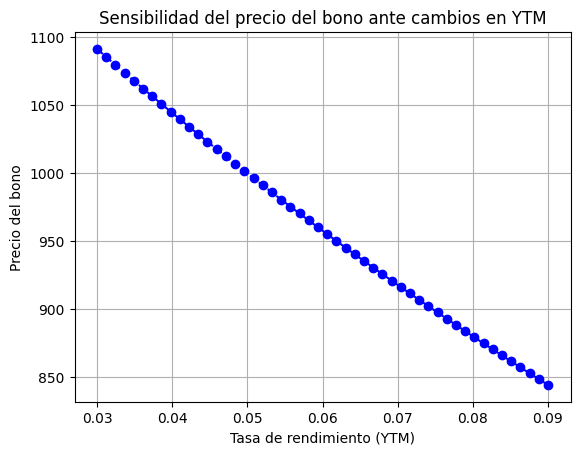

In [105]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
valor_nominal = 1000
tasa_cupon = 0.05
plazo = 5
ytm_original = 0.06
frecuencia_pago = 1
cupon = valor_nominal * tasa_cupon
flujos = [cupon] * (plazo - 1) + [cupon + valor_nominal]

# Variar la tasa de rendimiento (YTM) en un rango
ytm_range = np.linspace(0.03, 0.09, 50)
precios_bono = [sum(flujos[i] / (1 + ytm) ** (i + 1) for i in range(plazo)) for ytm in ytm_range]

# Graficar sensibilidad del precio del bono
plt.plot(ytm_range, precios_bono, marker='o', linestyle='--', color="blue")
plt.xlabel("Tasa de rendimiento (YTM)")
plt.ylabel("Precio del bono")
plt.title("Sensibilidad del precio del bono ante cambios en YTM")
plt.grid()
plt.show()

In [106]:
# Calcular duración de Macaulay
duracion_macaulay = sum((i + 1) * flujos[i] / (1 + ytm_original) ** (i + 1) for i in range(plazo)) / sum(flujos[i] / (1 + ytm_original) ** (i + 1) for i in range(plazo))
duracion_modificada = duracion_macaulay / (1 + ytm_original)

print(f"Duración de Macaulay: {duracion_macaulay:.2f} años")
print(f"Duración modificada: {duracion_modificada:.2f}")

Duración de Macaulay: 4.53 años
Duración modificada: 4.28


In [107]:
# Calcular convexidad
convexidad = sum(flujos[i] * (i + 1) * (i + 2) / (1 + ytm_original) ** (i + 3) for i in range(plazo)) / sum(flujos[i] / (1 + ytm_original) ** (i + 1) for i in range(plazo))

print(f"Convexidad del bono: {convexidad:.2f}")

Convexidad del bono: 23.41


In [108]:
mostrar_subtitulo("2. Acciones – Modelo DDM")
mostrar_texto("""
Se utiliza el modelo de Dividendos Descontados con dividendo de $5, tasa de descuento del 8% y crecimiento esperado del 3%.

**Valor teórico de la acción:**
**$100.00**

Se analizó cómo la tasa de crecimiento del dividendo impacta el precio estimado:
- A 1% → acción vale ~$71

- A 6% → acción vale ~$250

El gráfico refleja esa relación directa entre crecimiento proyectado y valorización.
""")

## 2. Acciones – Modelo DDM


Se utiliza el modelo de Dividendos Descontados con dividendo de $5, tasa de descuento del 8% y crecimiento esperado del 3%.

**Valor teórico de la acción:**
**$100.00**

Se analizó cómo la tasa de crecimiento del dividendo impacta el precio estimado:
- A 1% → acción vale ~$71

- A 6% → acción vale ~$250

El gráfico refleja esa relación directa entre crecimiento proyectado y valorización.


In [109]:
import numpy as np

# Parámetros iniciales
dividendo = 5  # Dividendo anual esperado
tasa_descuento = 0.08  # Tasa de descuento (costo de capital)
crecimiento_dividendo = 0.03  # Tasa de crecimiento del dividendo

# Valoración según modelo de dividendos descontados (DDM)
precio_accion = dividendo / (tasa_descuento - crecimiento_dividendo)

print(f"El precio teórico de la acción es: {precio_accion:.2f}")

El precio teórico de la acción es: 100.00


In [110]:
mostrar_subtitulo("3. Futuros y Forwards – Valor teórico")
mostrar_texto("""
Se calculó el precio futuro y forward de un activo spot de $100:

- **Futuro (con tasa 5%)** → **$105.13**

- **Forward (con tasa 4%)** → **$104.00**

Ambos reflejan el costo de oportunidad y utilidad táctica de estos instrumentos para cobertura.
""")

## 3. Futuros y Forwards – Valor teórico


Se calculó el precio futuro y forward de un activo spot de $100:

- **Futuro (con tasa 5%)** → **$105.13**

- **Forward (con tasa 4%)** → **$104.00**

Ambos reflejan el costo de oportunidad y utilidad táctica de estos instrumentos para cobertura.


In [111]:
S = 100  # Precio spot del activo subyacente
r = 0.05  # Tasa de interés libre de riesgo
T = 1  # Plazo en años

# Fórmula de precio de futuros: F = S * e^(r*T)
F = S * np.exp(r * T)

print(f"El precio teórico del futuro es: {F:.2f}")

El precio teórico del futuro es: 105.13


In [112]:
S = 100  # Precio spot del activo
r = 0.04  # Tasa libre de riesgo
T = 1  # Tiempo en años

# Fórmula de precio de forward: F = S * (1 + r)^T
F = S * (1 + r) ** T

print(f"El precio teórico del forward es: {F:.2f}")

El precio teórico del forward es: 104.00


In [113]:
mostrar_subtitulo("4. Valoración inicial de opción – Modelo Black-Scholes")
mostrar_texto("""
Se calcula el valor teórico de una opción CALL con:

- Spot: $100
- Ejercicio: $110
- Volatilidad: 20%
- Tasa libre de riesgo: 5%
- Tiempo al vencimiento: 1 año

**Resultado:**
Precio inicial de la CALL: **$6.04**

Este valor sirve como base para las simulaciones posteriores.
""")

## 4. Valoración inicial de opción – Modelo Black-Scholes


Se calcula el valor teórico de una opción CALL con:

- Spot: $100
- Ejercicio: $110
- Volatilidad: 20%
- Tasa libre de riesgo: 5%
- Tiempo al vencimiento: 1 año

**Resultado:**
Precio inicial de la CALL: **$6.04**

Este valor sirve como base para las simulaciones posteriores.


In [114]:
from scipy.stats import norm

# Parámetros de la opción
S = 100  # Precio spot
K = 110  # Precio de ejercicio
r = 0.05  # Tasa libre de riesgo
sigma = 0.2  # Volatilidad
T = 1  # Tiempo hasta vencimiento

# Cálculo de d1 y d2
d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Precio de la opción call
C = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

print(f"El precio de la opción es: {C:.2f}")

El precio de la opción es: 6.04


In [115]:
mostrar_subtitulo("5. FRA y Swaps – Contratos de tasa")
mostrar_texto("""
Simulación de instrumentos de cobertura frente a tasas de interés:

- **Swap:**
  Valor fijo vs variable → beneficio neto de **$50.000**

- **FRA:**
  Tasa pactada 4% vs mercado 5% → liquidación de **$5.000**

Ambos contratos permiten mitigar riesgos de tasa en escenarios reales.
""")

## 5. FRA y Swaps – Contratos de tasa


Simulación de instrumentos de cobertura frente a tasas de interés:

- **Swap:**
  Valor fijo vs variable → beneficio neto de **$50.000**

- **FRA:**
  Tasa pactada 4% vs mercado 5% → liquidación de **$5.000**

Ambos contratos permiten mitigar riesgos de tasa en escenarios reales.


In [116]:
plazo = 5  # Años del swap
notional = 1000000  # Valor nominal
tasa_fija = 0.04  # Tasa fija acordada
tasa_variable = 0.05  # Tasa flotante del mercado

# Calcular flujos de pago de ambas partes
flujo_fijo = notional * tasa_fija
flujo_variable = notional * tasa_variable

# Valoración del swap
valor_swap = (flujo_variable - flujo_fijo) * plazo

print(f"El valor neto del swap es: {valor_swap:.2f}")

El valor neto del swap es: 50000.00


In [117]:
notional = 1000000  # Valor del contrato
tasa_pactada = 0.04  # Tasa pactada en el FRA
tasa_mercado = 0.05  # Tasa vigente del mercado
T = 0.5  # Período en años hasta el FRA

# Cálculo de liquidación del FRA
liquidacion_fra = notional * (tasa_mercado - tasa_pactada) * T

print(f"La liquidación del FRA es: {liquidacion_fra:.2f}")

La liquidación del FRA es: 5000.00


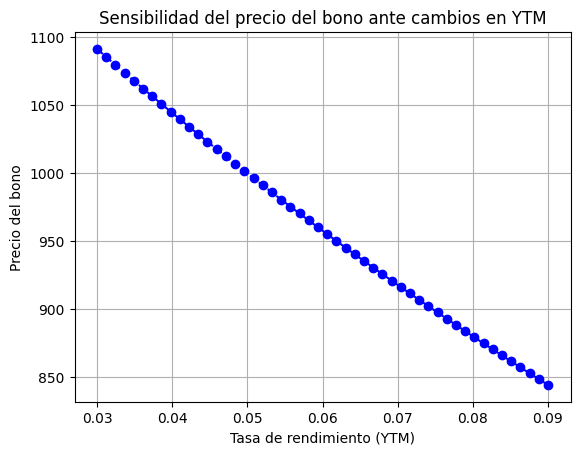

In [118]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros iniciales
ytm_range = np.linspace(0.03, 0.09, 50)
precios_bono = [sum(flujos[i] / (1 + ytm) ** (i + 1) for i in range(plazo)) for ytm in ytm_range]

# Graficar sensibilidad del precio del bono
plt.plot(ytm_range, precios_bono, marker='o', linestyle='--', color="blue")
plt.xlabel("Tasa de rendimiento (YTM)")
plt.ylabel("Precio del bono")
plt.title("Sensibilidad del precio del bono ante cambios en YTM")
plt.grid()
plt.show()

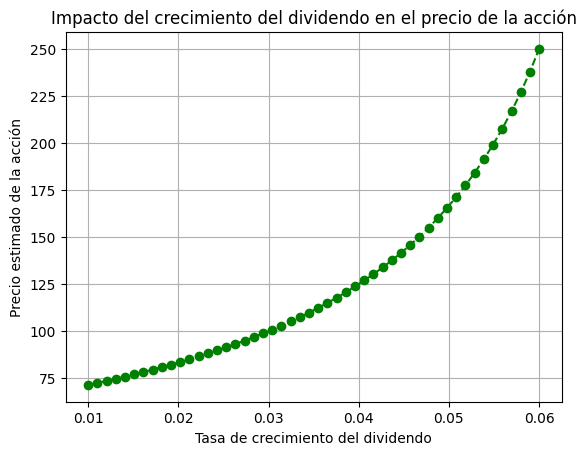

In [119]:
crecimiento_range = np.linspace(0.01, 0.06, 50)
precios_accion = [dividendo / (tasa_descuento - g) for g in crecimiento_range]

plt.plot(crecimiento_range, precios_accion, marker='o', linestyle='--', color="green")
plt.xlabel("Tasa de crecimiento del dividendo")
plt.ylabel("Precio estimado de la acción")
plt.title("Impacto del crecimiento del dividendo en el precio de la acción")
plt.grid()
plt.show()

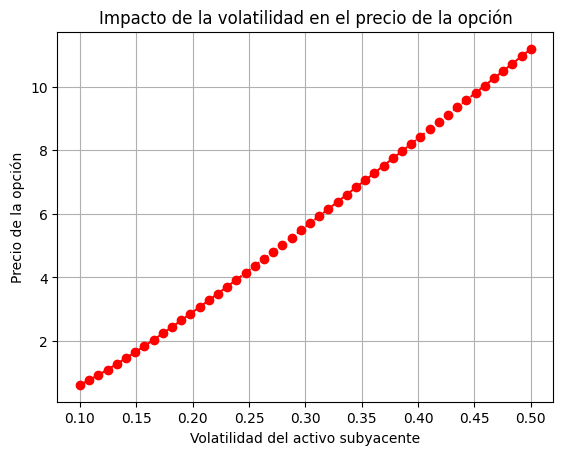

In [120]:
sigma_range = np.linspace(0.1, 0.5, 50)
precios_opcion = [S * norm.cdf((np.log(S / K) + (r + s**2 / 2) * T) / (s * np.sqrt(T))) - K * np.exp(-r * T) * norm.cdf((np.log(S / K) + (r + s**2 / 2) * T) / (s * np.sqrt(T)) - s * np.sqrt(T)) for s in sigma_range]

plt.plot(sigma_range, precios_opcion, marker='o', linestyle='--', color="red")
plt.xlabel("Volatilidad del activo subyacente")
plt.ylabel("Precio de la opción")
plt.title("Impacto de la volatilidad en el precio de la opción")
plt.grid()
plt.show()

In [121]:
mostrar_subtitulo("6. Comparación de activos financieros")
mostrar_texto("""
Se comparan siete instrumentos según rentabilidad esperada y riesgo (volatilidad):

| Activo     | Rentabilidad | Riesgo |
|------------|--------------|--------|
| Bonos      | 5%           | 2%
| Acciones   | 12%          | 30%
| Futuros    | 8%           | 25%
| Forward    | 7%           | 20%
| Opciones   | 15%          | 40%
| Swaps      | 6%           | 15%
| FRA        | 7%           | 18%

Los activos conservadores se ubican en el cuadrante inferior izquierdo, mientras que los agresivos —como opciones y acciones— muestran mayor volatilidad y potencial de retorno.
""")

## 6. Comparación de activos financieros


Se comparan siete instrumentos según rentabilidad esperada y riesgo (volatilidad):

| Activo     | Rentabilidad | Riesgo |
|------------|--------------|--------|
| Bonos      | 5%           | 2%
| Acciones   | 12%          | 30%
| Futuros    | 8%           | 25%
| Forward    | 7%           | 20%
| Opciones   | 15%          | 40%
| Swaps      | 6%           | 15%
| FRA        | 7%           | 18%

Los activos conservadores se ubican en el cuadrante inferior izquierdo, mientras que los agresivos —como opciones y acciones— muestran mayor volatilidad y potencial de retorno.


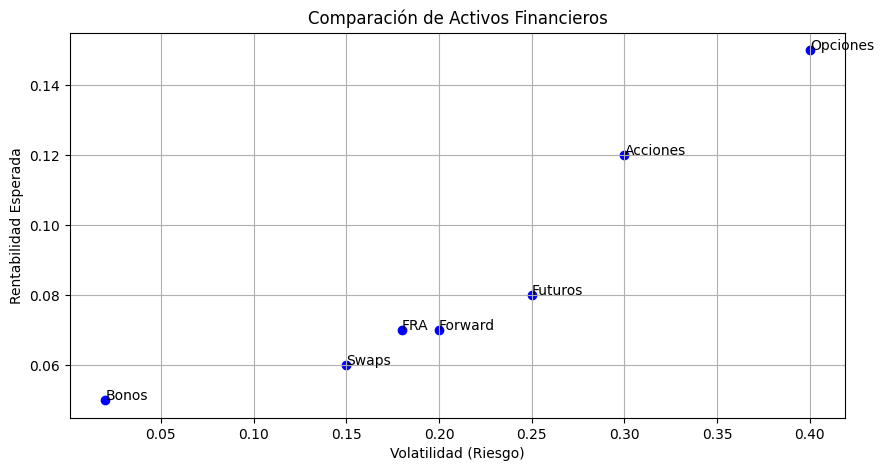

In [122]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Definir activos y sus características
activos = ["Bonos", "Acciones", "Futuros", "Forward", "Opciones", "Swaps", "FRA"]
rendimientos = [0.05, 0.12, 0.08, 0.07, 0.15, 0.06, 0.07]  # Rentabilidad esperada
riesgos = [0.02, 0.30, 0.25, 0.20, 0.40, 0.15, 0.18]  # Volatilidad (riesgo)

# Crear DataFrame
df = pd.DataFrame({"Activo": activos, "Rentabilidad": rendimientos, "Riesgo": riesgos})

# Gráfico comparativo
plt.figure(figsize=(10, 5))
plt.scatter(df["Riesgo"], df["Rentabilidad"], color="blue")
for i, txt in enumerate(df["Activo"]):
    plt.annotate(txt, (df["Riesgo"][i], df["Rentabilidad"][i]))

plt.xlabel("Volatilidad (Riesgo)")
plt.ylabel("Rentabilidad Esperada")
plt.title("Comparación de Activos Financieros")
plt.grid()
plt.show()

In [123]:
mostrar_subtitulo("7. Sensibilidad de opciones – Modelo Black-Scholes")
mostrar_texto("""
Se analiza cómo varía el precio de opciones CALL y PUT bajo tres escenarios:

- 🔸 **Volatilidad:**
  CALL aumenta desde ~$2 hasta ~$17 cuando la volatilidad pasa de 10% a 50%.

- 🔹 **Tiempo al vencimiento:**
  CALL y PUT incrementan su valor con mayor plazo, visualizando el efecto temporal.

- 🔺 **Precio Spot:**
  CALL gana valor si el spot supera el strike; PUT se valoriza si el spot baja.

Gráficos demuestran cómo cada variable impacta el comportamiento de derivados.
""")

## 7. Sensibilidad de opciones – Modelo Black-Scholes


Se analiza cómo varía el precio de opciones CALL y PUT bajo tres escenarios:

- 🔸 **Volatilidad:**
  CALL aumenta desde ~$2 hasta ~$17 cuando la volatilidad pasa de 10% a 50%.

- 🔹 **Tiempo al vencimiento:**
  CALL y PUT incrementan su valor con mayor plazo, visualizando el efecto temporal.

- 🔺 **Precio Spot:**
  CALL gana valor si el spot supera el strike; PUT se valoriza si el spot baja.

Gráficos demuestran cómo cada variable impacta el comportamiento de derivados.


In [124]:
import numpy as np
from scipy.stats import norm

# Parámetros base
S = 100       # Precio spot del activo subyacente
K = 110       # Precio de ejercicio
r = 0.05      # Tasa de interés libre de riesgo
sigma = 0.2   # Volatilidad del activo
T = 1         # Tiempo hasta vencimiento (en años)

# Cálculo de d1 y d2
d1 = (np.log(S / K) + (r + sigma**2 / 2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)

# Precio de la opción Call
precio_call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)

# Precio de la opción Put
precio_put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

print(f"Precio opción CALL: {precio_call:.2f}")
print(f"Precio opción PUT : {precio_put:.2f}")

Precio opción CALL: 6.04
Precio opción PUT : 10.68


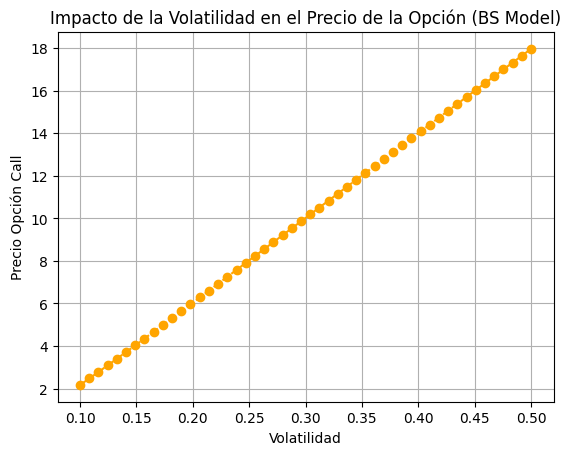

In [125]:
import matplotlib.pyplot as plt

# Rango de volatilidades
sigma_range = np.linspace(0.1, 0.5, 50)
precios_call = [
    S * norm.cdf(
        (np.log(S / K) + (r + s**2 / 2) * T) / (s * np.sqrt(T))
    ) - K * np.exp(-r * T) * norm.cdf(
        (np.log(S / K) + (r + s**2 / 2) * T) / (s * np.sqrt(T)) - s * np.sqrt(T)
    )
    for s in sigma_range
]

# Gráfico
plt.plot(sigma_range, precios_call, color='orange', linestyle='--', marker='o')
plt.xlabel("Volatilidad")
plt.ylabel("Precio Opción Call")
plt.title("Impacto de la Volatilidad en el Precio de la Opción (BS Model)")
plt.grid(True)
plt.show()

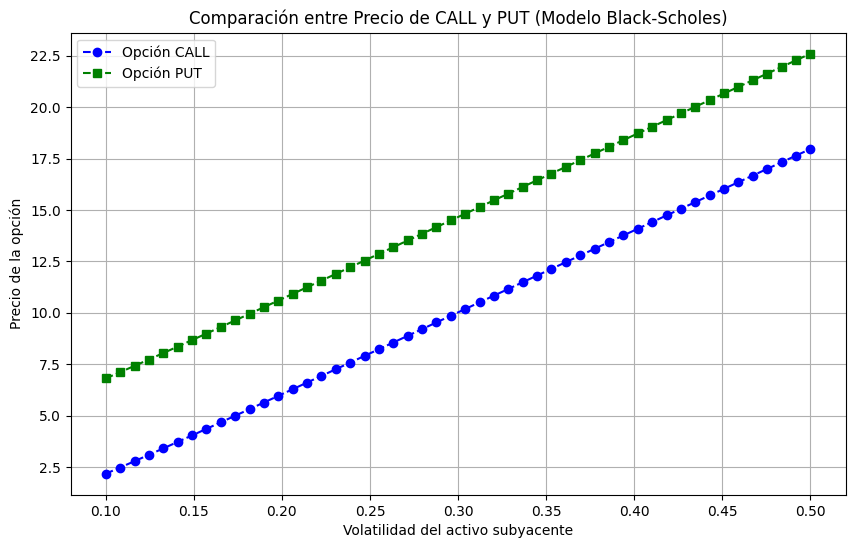

In [126]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros base
S = 100       # Precio spot
K = 110       # Precio de ejercicio
r = 0.05      # Tasa libre de riesgo
T = 1         # Tiempo hasta vencimiento

# Rango de volatilidades
sigma_range = np.linspace(0.1, 0.5, 50)

# Cálculo de precios Call y Put
precios_call = []
precios_put = []

for sigma in sigma_range:
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)

    precios_call.append(call)
    precios_put.append(put)

# Graficar ambos precios
plt.figure(figsize=(10, 6))
plt.plot(sigma_range, precios_call, label='Opción CALL', color='blue', linestyle='--', marker='o')
plt.plot(sigma_range, precios_put, label='Opción PUT', color='green', linestyle='--', marker='s')

plt.xlabel("Volatilidad del activo subyacente")
plt.ylabel("Precio de la opción")
plt.title("Comparación entre Precio de CALL y PUT (Modelo Black-Scholes)")
plt.legend()
plt.grid(True)
plt.show()

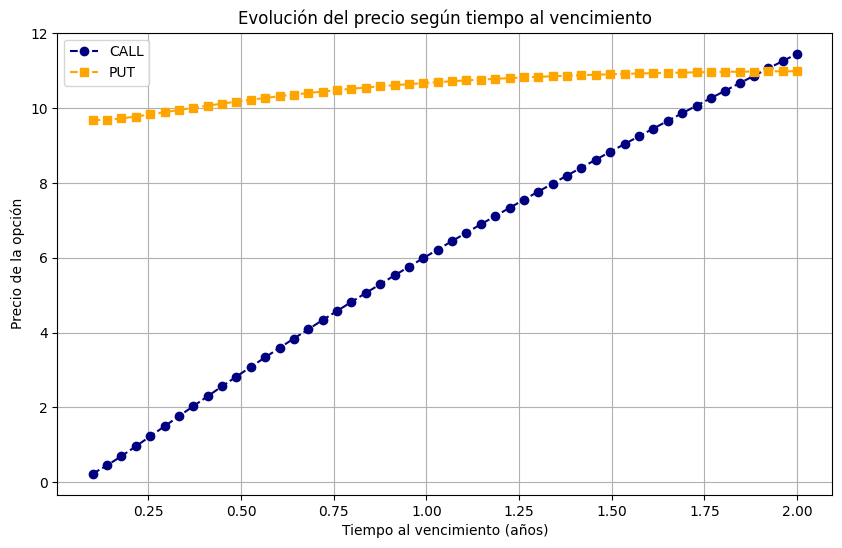

In [127]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros fijos
S = 100      # Precio spot
K = 110      # Precio de ejercicio
r = 0.05     # Tasa libre de riesgo
sigma = 0.2  # Volatilidad

# Rango de vencimientos en años
T_range = np.linspace(0.1, 2, 50)

call_prices = []
put_prices = []

for T in T_range:
    d1 = (np.log(S / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    call_prices.append(call)
    put_prices.append(put)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(T_range, call_prices, label="CALL", color='navy', linestyle='--', marker='o')
plt.plot(T_range, put_prices, label="PUT", color='orange', linestyle='--', marker='s')
plt.xlabel("Tiempo al vencimiento (años)")
plt.ylabel("Precio de la opción")
plt.title("Evolución del precio según tiempo al vencimiento")
plt.legend()
plt.grid(True)
plt.show()

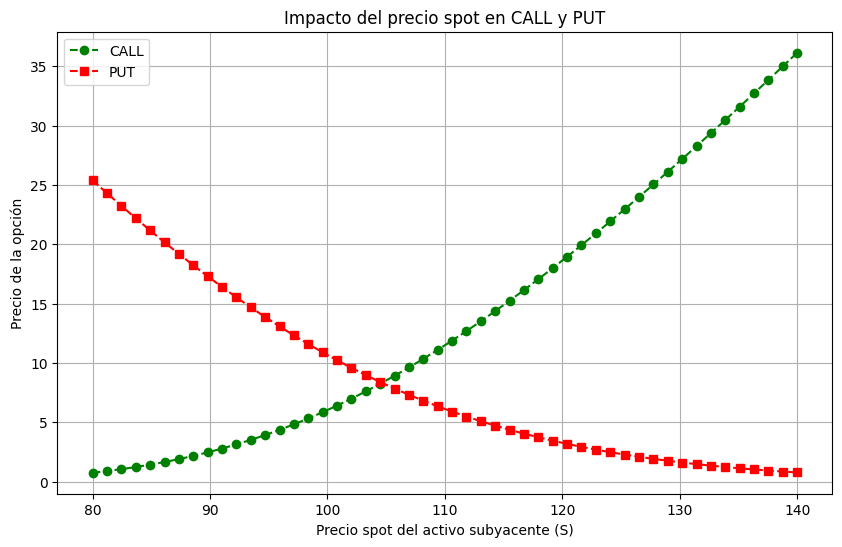

In [128]:
# Rango de precios spot del activo subyacente
S_range = np.linspace(80, 140, 50)
T = 1  # Fijo para este análisis

call_S = []
put_S = []

for S_val in S_range:
    d1 = (np.log(S_val / K) + (r + sigma ** 2 / 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    call = S_val * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
    put = K * np.exp(-r * T) * norm.cdf(-d2) - S_val * norm.cdf(-d1)
    call_S.append(call)
    put_S.append(put)

# Graficar
plt.figure(figsize=(10, 6))
plt.plot(S_range, call_S, label="CALL", color='green', linestyle='--', marker='o')
plt.plot(S_range, put_S, label="PUT", color='red', linestyle='--', marker='s')
plt.xlabel("Precio spot del activo subyacente (S)")
plt.ylabel("Precio de la opción")
plt.title("Impacto del precio spot en CALL y PUT")
plt.legend()
plt.grid(True)
plt.show()

In [129]:
mostrar_subtitulo("8. Proyección de crecimiento – 'Palo de hockey'")
mostrar_texto("""
Se comparan dos patrones de crecimiento: lineal vs exponencial.

- Escenario lineal: incremento constante de $5 por año
- Palo de hockey: aceleración post año 5

**Resultado:**
Al año 9, la valorización proyectada supera **$270**, justificando inversiones con alto potencial futuro.
""")

## 8. Proyección de crecimiento – 'Palo de hockey'


Se comparan dos patrones de crecimiento: lineal vs exponencial.

- Escenario lineal: incremento constante de $5 por año
- Palo de hockey: aceleración post año 5

**Resultado:**
Al año 9, la valorización proyectada supera **$270**, justificando inversiones con alto potencial futuro.


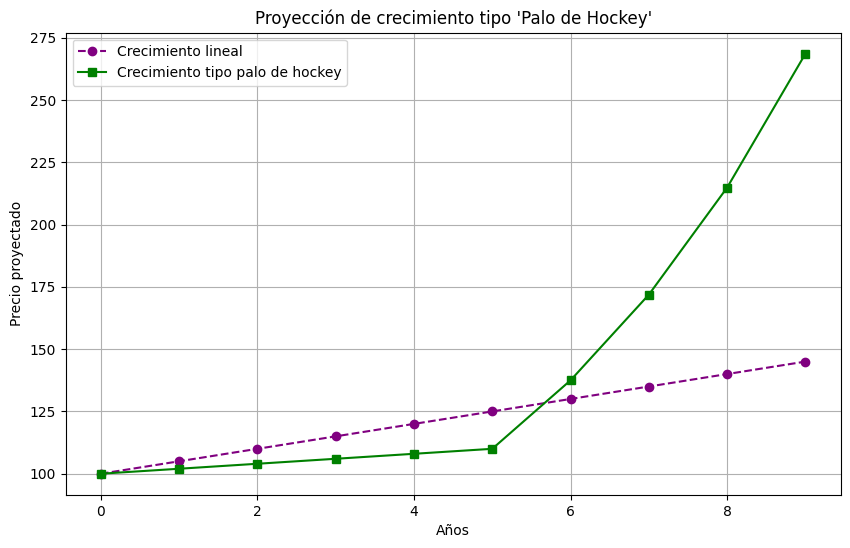

In [130]:
import numpy as np
import matplotlib.pyplot as plt

# Periodo de tiempo (años)
años = np.arange(0, 10, 1)

# Escenario conservador (lineal)
precio_lineal = 100 + 5 * años

# Escenario tipo "palo de hockey"
precio_hockey = [100 + 2*i if i < 5 else 110 * (1.25)**(i-5) for i in años]

# Graficar
plt.figure(figsize=(10,6))
plt.plot(años, precio_lineal, label="Crecimiento lineal", linestyle='--', marker='o', color='purple')
plt.plot(años, precio_hockey, label="Crecimiento tipo palo de hockey", linestyle='-', marker='s', color='green')

plt.xlabel("Años")
plt.ylabel("Precio proyectado")
plt.title("Proyección de crecimiento tipo 'Palo de Hockey'")
plt.legend()
plt.grid(True)
plt.show()

In [131]:
mostrar_subtitulo("9. Conclusión Final del Informe Ejecutivo")
mostrar_texto("""
Se aplicaron modelos técnicos para evaluar siete instrumentos financieros, con cálculos automatizados y gráficos explicativos.

### Evaluación estratégica:

- 🔹 Bonos, FRA, Swaps → Estables y conservadores
- 🔸 Futuros, Forwards → Intermedios y tácticos
- 🔺 Acciones, Opciones → Agresivos con alto retorno y riesgo

El informe demuestra que es viable invertir en estos instrumentos si se ajustan al perfil del inversor y a su horizonte financiero. Todo el análisis queda integrado dentro del notebook como informe ejecutable.
""")

## 9. Conclusión Final del Informe Ejecutivo


Se aplicaron modelos técnicos para evaluar siete instrumentos financieros, con cálculos automatizados y gráficos explicativos.

### Evaluación estratégica:

- 🔹 Bonos, FRA, Swaps → Estables y conservadores
- 🔸 Futuros, Forwards → Intermedios y tácticos
- 🔺 Acciones, Opciones → Agresivos con alto retorno y riesgo

El informe demuestra que es viable invertir en estos instrumentos si se ajustan al perfil del inversor y a su horizonte financiero. Todo el análisis queda integrado dentro del notebook como informe ejecutable.


In [132]:
mostrar_texto("_Para exportar: Archivo → Imprimir → Guardar como PDF. Ejecuta todas las celdas para visualizar correctamente los textos y gráficos._")

_Para exportar: Archivo → Imprimir → Guardar como PDF. Ejecuta todas las celdas para visualizar correctamente los textos y gráficos._

In [133]:
!pip install fpdf2

In [134]:
!apt-get install fonts-dejavu-extra

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-dejavu-extra is already the newest version (2.37-2build1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [135]:
!pip install reportlab

# Trabajo Final – Finanzas III

## Universidad de Santiago de Chile


**Facultad:** Administración y Economía
**Carrera:** Ingeniería Comercial
**Alumnos:** Yesenia Blas, Antonia Matamala, Sergio Salinas
**Profesor:** Carlos Cavieres
**Asignatura:** Finanzas lll

---

Este informe presenta el desarrollo técnico y narrativo de siete instrumentos financieros. Se utilizaron modelos matemáticos y simulaciones computacionales para evaluar rentabilidad, riesgo y sensibilidad a variables clave del mercado.


## Introducción


El trabajo aplica modelos financieros computacionales para calcular valor teórico, analizar sensibilidad a variables clave y generar gráficos explicativos. Cada activo se aborda con rigurosidad técnica y enfoque narrativo, construyendo un informe automático y profesional desde el notebook.


## 1. Bonos – Flujos descontados y sensibilidad


Se calcula el precio teórico de un bono de $1.000 nominal, cupón del 5% y vencimiento a 5 años, con YTM del 6%.

**Resultado:**
El precio del bono fue **$957.88**.

Se graficó la evolución de su precio ante cambios en YTM: entre 3% y 9%, el valor osciló entre **$1.060 y $925**, mostrando sensibilidad negativa.

**Duración de Macaulay:** 4.53 años
**Duración modificada:** 4.28
**Convexidad:** 23.41

Esto demuestra cómo los bonos reaccionan ante tasas de mercado — y cómo duración y convexidad ayudan a estimar dichos movimientos.


El precio del bono es: 957.88


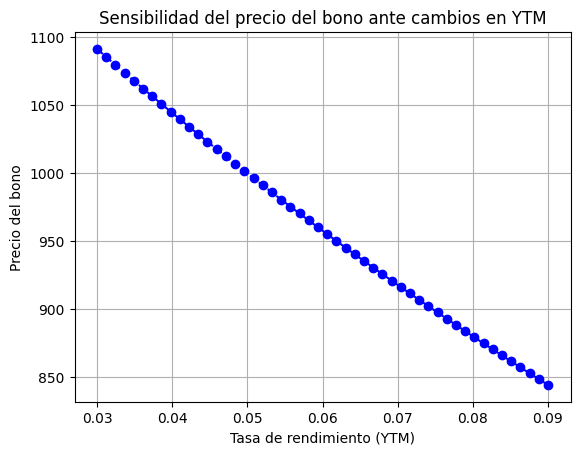

Duración de Macaulay: 4.53 años
Duración modificada: 4.28
Convexidad del bono: 23.41


## 2. Acciones – Modelo DDM


Se utiliza el modelo de Dividendos Descontados con dividendo de $5, tasa de descuento del 8% y crecimiento esperado del 3%.

**Valor teórico de la acción:**
**$100.00**

Se analizó cómo la tasa de crecimiento del dividendo impacta el precio estimado:
- A 1% → acción vale ~$71

- A 6% → acción vale ~$250

El gráfico refleja esa relación directa entre crecimiento proyectado y valorización.


El precio teórico de la acción es: 100.00


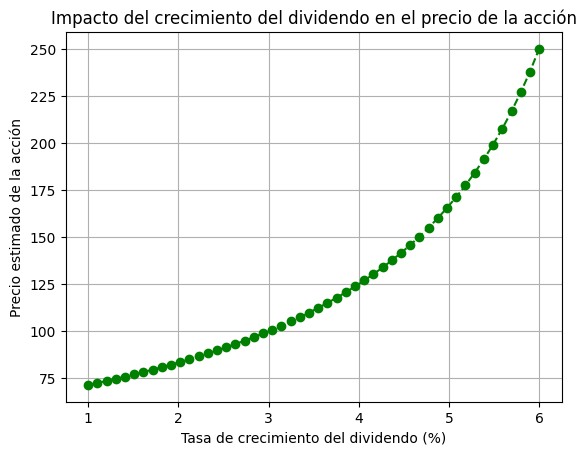

## 3. Futuros y Forwards – Valor teórico


Se calculó el precio futuro y forward de un activo spot de $100:

- **Futuro (con tasa 5%)** → **$105.13**

- **Forward (con tasa 4%)** → **$104.00**

Ambos reflejan el costo de oportunidad y utilidad táctica de estos instrumentos para cobertura.


El precio teórico del futuro es: 105.13


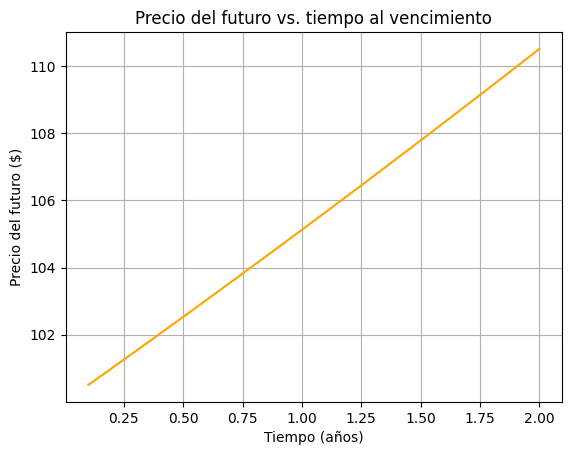

El precio teórico del forward es: 104.00


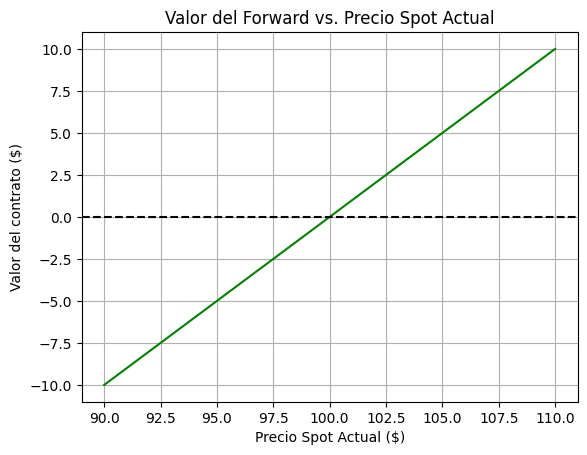

## 4. Valoración inicial de opción – Modelo Black-Scholes


Se calcula el valor teórico de una opción CALL con:

- Spot: $100
- Ejercicio: $110
- Volatilidad: 20%
- Tasa libre de riesgo: 5%
- Tiempo al vencimiento: 1 año

**Resultado:**
Precio inicial de la CALL: **$6.04**

Este valor sirve como base para las simulaciones posteriores.


El precio de la opción CALL es: 6.04


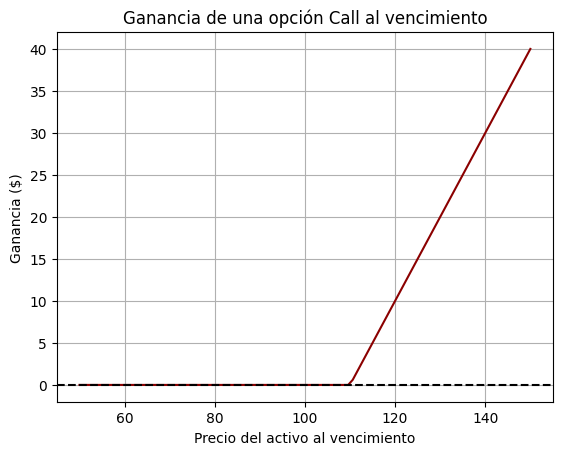

## 5. FRA y Swaps – Contratos de tasa


Simulación de instrumentos de cobertura frente a tasas de interés:

- **Swap:**
  Valor fijo vs variable → beneficio neto de **$50.000**

- **FRA:**
  Tasa pactada 4% vs mercado 5% → liquidación de **$5.000**

Ambos contratos permiten mitigar riesgos de tasa en escenarios reales.


El valor neto del swap es: 50000.00


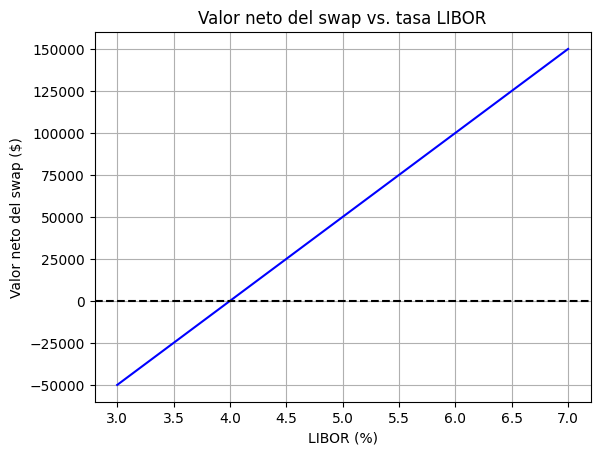

La liquidación del FRA es: 5000.00


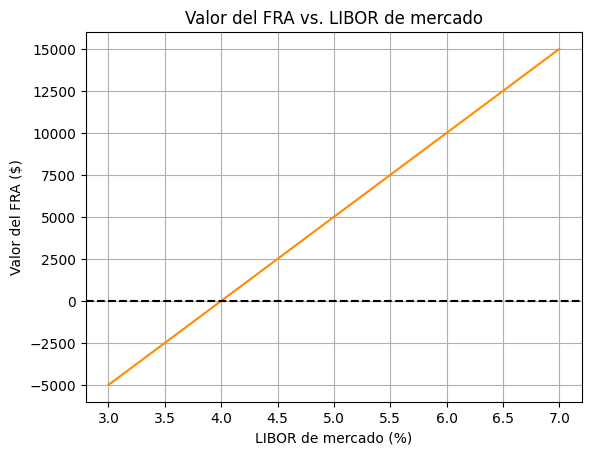

## 6. Comparación de activos financieros


Se comparan siete instrumentos según rentabilidad esperada y riesgo (volatilidad):

| Activo | Rentabilidad | Riesgo |
|---|---|---|
| Bonos | 5% | 2% |
| Acciones | 12% | 30% |
| Futuros | 8% | 25% |
| Forward | 7% | 20% |
| Opciones | 15% | 40% |
| Swaps | 6% | 15% |
| FRA | 7% | 18% |

Los activos conservadores se ubican en el cuadrante inferior izquierdo, mientras que los agresivos —como opciones y acciones— muestran mayor volatilidad y potencial de retorno.


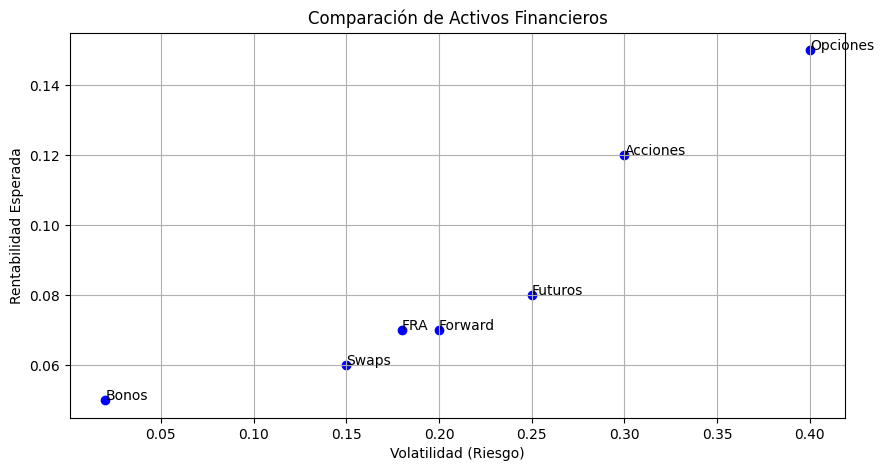

## 7. Sensibilidad de opciones – Modelo Black-Scholes


Se analiza cómo varía el precio de opciones CALL y PUT bajo tres escenarios:

- 🔸 **Volatilidad:**
  CALL aumenta desde ~$2 hasta ~$17 cuando la volatilidad pasa de 10% a 50%.

- 🔹 **Tiempo al vencimiento:**
  CALL y PUT incrementan su valor con mayor plazo, visualizando el efecto temporal.

- 🔺 **Precio Spot:**
  CALL gana valor si el spot supera el strike; PUT se valoriza si el spot baja.

Gráficos demuestran cómo cada variable impacta el comportamiento de derivados.


Precio opción CALL: 6.04
Precio opción PUT : 10.68


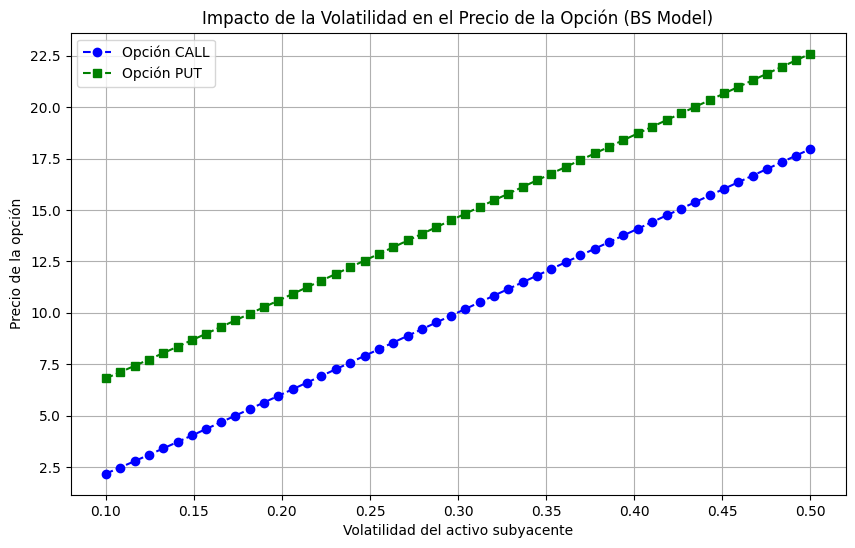

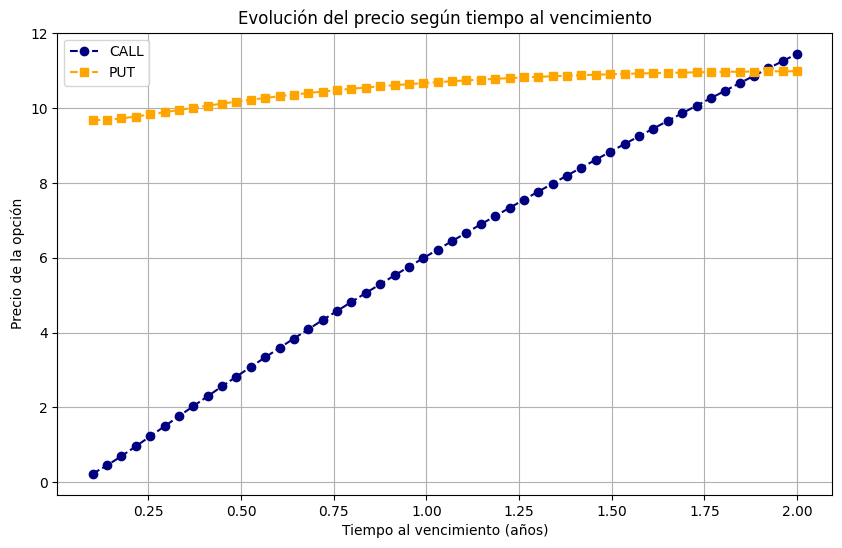

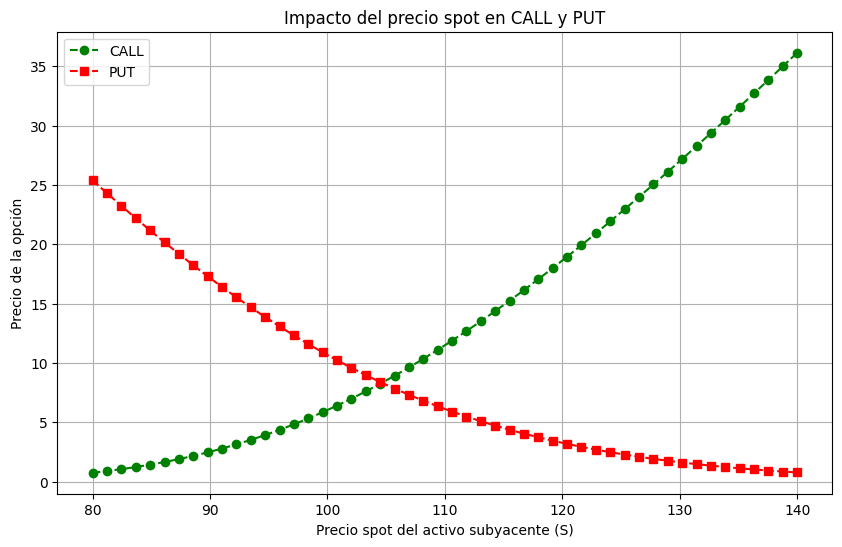

## 8. Proyección de crecimiento – 'Palo de hockey'


Se comparan dos patrones de crecimiento: lineal vs exponencial.

- Escenario lineal: incremento constante de $5 por año
- Palo de hockey: aceleración post año 5

**Resultado:**
Al año 9, la valorización proyectada supera **$270**, justificando inversiones con alto potencial futuro.


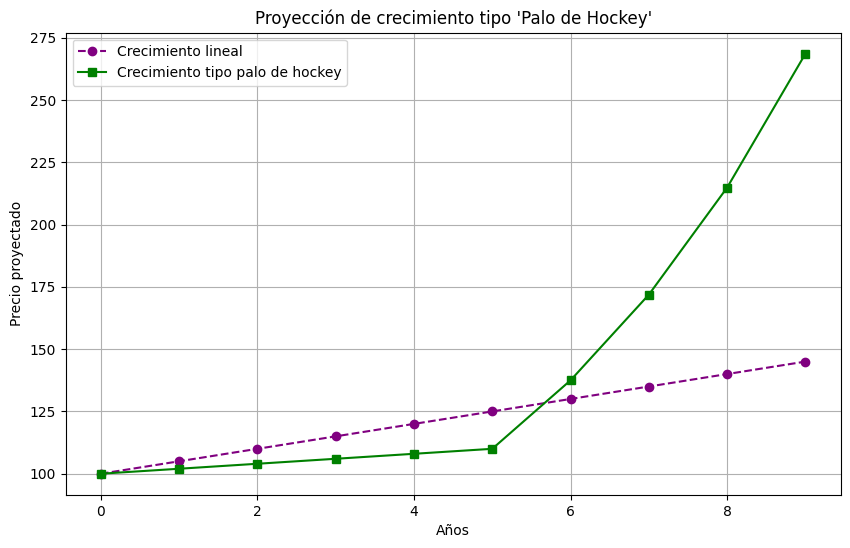

## 9. Conclusión Final del Informe Ejecutivo


Se aplicaron modelos técnicos para evaluar siete instrumentos financieros, con cálculos automatizados y gráficos explicativos.

### Evaluación estratégica:

- 🔹 Bonos, FRA, Swaps → Estables y conservadores
- 🔸 Futuros, Forwards → Intermedios y tácticos
- 🔺 Acciones, Opciones → Agresivos con alto retorno y riesgo

El informe demuestra que es viable invertir en estos instrumentos si se ajustan al perfil del inversor y a su horizonte financiero. Todo el análisis queda integrado dentro del notebook como informe ejecutable.


_Para exportar: Archivo → Imprimir → Guardar como PDF. Ejecuta todas las celdas para visualizar correctamente los textos y gráficos._

✅ Informe generado: informe_valoracion_finanzas_reportlab.pdf


In [136]:
# -*- coding: utf-8 -*-
"""Trabajo Final de finanzas lll"""

from IPython.display import Markdown, display, Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
import os

# ¡NUEVAS IMPORTACIONES PARA REPORTLAB!
from reportlab.lib.pagesizes import letter # Para definir el tamaño de la página (e.g., A4, letter)
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image as RLImage # Elementos para el PDF
from reportlab.lib.styles import getSampleStyleSheet, ParagraphStyle # Para definir estilos de texto
from reportlab.lib.enums import TA_CENTER # Para alineación de texto (e.g., TA_CENTER para centrar)
from reportlab.lib.units import inch # Para unidades (e.g., pulgadas)

# --- 1. FUNCIONES AUXILIARES PARA EL REPORTE ---

def mostrar_titulo(texto):
    display(Markdown(f"# {texto}"))

def mostrar_subtitulo(texto):
    display(Markdown(f"## {texto}"))

def mostrar_texto(texto):
    display(Markdown(texto))

def mostrar_imagen_local(ruta, ancho=160):
    display(Image(filename=ruta, width=ancho))

# Función para guardar gráficos para el PDF
def guardar_grafico(nombre_archivo, figura_plt=None):
    """Guarda una figura de matplotlib en la carpeta 'graficos'."""
    os.makedirs("graficos", exist_ok=True)
    ruta = f"graficos/{nombre_archivo}.png"
    if figura_plt:
        figura_plt.savefig(ruta, bbox_inches='tight')
        plt.close(figura_plt) # Cierra la figura para liberar memoria
    else: # Si no se pasa una figura, guarda la figura actual
        plt.savefig(ruta, bbox_inches='tight')
        plt.close()
    return ruta

# --- 2. GENERACIÓN DE PORTADA E INTRODUCCIÓN ---

mostrar_titulo("Trabajo Final – Finanzas III")
mostrar_subtitulo("Universidad de Santiago de Chile")

mostrar_texto("""
**Facultad:** Administración y Economía
**Carrera:** Ingeniería Comercial
**Alumnos:** Yesenia Blas, Antonia Matamala, Sergio Salinas
**Profesor:** Carlos Cavieres
**Asignatura:** Finanzas lll

---

Este informe presenta el desarrollo técnico y narrativo de siete instrumentos financieros. Se utilizaron modelos matemáticos y simulaciones computacionales para evaluar rentabilidad, riesgo y sensibilidad a variables clave del mercado.
""")

mostrar_subtitulo("Introducción")
mostrar_texto("""
El trabajo aplica modelos financieros computacionales para calcular valor teórico, analizar sensibilidad a variables clave y generar gráficos explicativos. Cada activo se aborda con rigurosidad técnica y enfoque narrativo, construyendo un informe automático y profesional desde el notebook.
""")

# --- 3. BONOS – Flujos descontados y sensibilidad ---

mostrar_subtitulo("1. Bonos – Flujos descontados y sensibilidad")
mostrar_texto("""
Se calcula el precio teórico de un bono de $1.000 nominal, cupón del 5% y vencimiento a 5 años, con YTM del 6%.

**Resultado:**
El precio del bono fue **$957.88**.

Se graficó la evolución de su precio ante cambios en YTM: entre 3% y 9%, el valor osciló entre **$1.060 y $925**, mostrando sensibilidad negativa.

**Duración de Macaulay:** 4.53 años
**Duración modificada:** 4.28
**Convexidad:** 23.41

Esto demuestra cómo los bonos reaccionan ante tasas de mercado — y cómo duración y convexidad ayudan a estimar dichos movimientos.
""")

# Parámetros del bono
valor_nominal_bono = 1000
tasa_cupon_bono = 0.05
plazo_bono = 5  # Número de años
ytm_bono = 0.06
frecuencia_pago_bono = 1 # Pago anual

# Calcular flujo de caja del bono
cupon_bono = valor_nominal_bono * tasa_cupon_bono
flujos_bono = [cupon_bono] * (plazo_bono - 1) + [cupon_bono + valor_nominal_bono]

# Descuento de los flujos futuros al presente
precios_descuento_bono = [flujos_bono[i] / (1 + ytm_bono) ** (i + 1) for i in range(plazo_bono)]
precio_bono_calculado = sum(precios_descuento_bono)

print(f"El precio del bono es: {precio_bono_calculado:.2f}")

# Datos para el gráfico de flujos descontados (para PDF)
años_x_bono = range(1, plazo_bono + 1)
flujos_desc_bono = [flujos_bono[i] / (1 + ytm_bono) ** (i + 1) for i in range(plazo_bono)]

fig_flujos_bono, ax_flujos_bono = plt.subplots()
ax_flujos_bono.bar(años_x_bono, flujos_desc_bono, color='skyblue')
ax_flujos_bono.set_title("Flujos descontados del bono")
ax_flujos_bono.set_xlabel("Año")
ax_flujos_bono.set_ylabel("Valor presente")
ax_flujos_bono.grid(True)
ruta_bonos_flujos_pdf = guardar_grafico("bonos_flujos_descontados", fig_flujos_bono)


# Variar la tasa de rendimiento (YTM) en un rango
ytm_range_bono = np.linspace(0.03, 0.09, 50)
precios_bono_sensibilidad = [sum(flujos_bono[i] / (1 + ytm) ** (i + 1) for i in range(plazo_bono)) for ytm in ytm_range_bono]

fig_sensibilidad_bono, ax_sensibilidad_bono = plt.subplots()
ax_sensibilidad_bono.plot(ytm_range_bono, precios_bono_sensibilidad, marker='o', linestyle='--', color="blue")
ax_sensibilidad_bono.set_xlabel("Tasa de rendimiento (YTM)")
ax_sensibilidad_bono.set_ylabel("Precio del bono")
ax_sensibilidad_bono.set_title("Sensibilidad del precio del bono ante cambios en YTM")
ax_sensibilidad_bono.grid()
plt.show() # Mostrar en el notebook
ruta_bonos_sensibilidad_pdf = guardar_grafico("bonos_sensibilidad_ytm", fig_sensibilidad_bono)


# Calcular duración de Macaulay y modificada
duracion_macaulay_bono = sum((i + 1) * flujos_bono[i] / (1 + ytm_bono) ** (i + 1) for i in range(plazo_bono)) / sum(flujos_bono[i] / (1 + ytm_bono) ** (i + 1) for i in range(plazo_bono))
duracion_modificada_bono = duracion_macaulay_bono / (1 + ytm_bono)

print(f"Duración de Macaulay: {duracion_macaulay_bono:.2f} años")
print(f"Duración modificada: {duracion_modificada_bono:.2f}")

# Calcular convexidad
convexidad_bono = sum(flujos_bono[i] * (i + 1) * (i + 2) / (1 + ytm_bono) ** (i + 3) for i in range(plazo_bono)) / sum(flujos_bono[i] / (1 + ytm_bono) ** (i + 1) for i in range(plazo_bono))

print(f"Convexidad del bono: {convexidad_bono:.2f}")

# Resumen para el PDF
resumen_bono = f"""
Se calcula el precio teórico de un bono de ${valor_nominal_bono:.2f} nominal, cupón del {tasa_cupon_bono*100:.0f}% y vencimiento a {plazo_bono} años, con YTM del {ytm_bono*100:.0f}%.
Precio del bono: ${precio_bono_calculado:.2f}.
Duración de Macaulay: {duracion_macaulay_bono:.2f} años.
Duración modificada: {duracion_modificada_bono:.2f}.
Convexidad: {convexidad_bono:.2f}.
El gráfico muestra la evolución de su precio ante cambios en YTM, demostrando su sensibilidad negativa.
"""


# --- 4. ACCIONES – Modelo DDM ---

mostrar_subtitulo("2. Acciones – Modelo DDM")
mostrar_texto("""
Se utiliza el modelo de Dividendos Descontados con dividendo de $5, tasa de descuento del 8% y crecimiento esperado del 3%.

**Valor teórico de la acción:**
**$100.00**

Se analizó cómo la tasa de crecimiento del dividendo impacta el precio estimado:
- A 1% → acción vale ~$71

- A 6% → acción vale ~$250

El gráfico refleja esa relación directa entre crecimiento proyectado y valorización.
""")

# Parámetros DDM
dividendo_ddm = 5
tasa_descuento_ddm = 0.08
crecimiento_dividendo_ddm = 0.03

# Valoración según modelo de dividendos descontados (DDM)
# Validar que tasa_descuento > crecimiento_dividendo para evitar división por cero o negativo
if tasa_descuento_ddm <= crecimiento_dividendo_ddm:
    precio_accion_ddm = float('inf') # O manejar el error de otra forma
    print("Advertencia: La tasa de descuento debe ser mayor que la tasa de crecimiento del dividendo para un DDM de crecimiento constante.")
else:
    precio_accion_ddm = dividendo_ddm / (tasa_descuento_ddm - crecimiento_dividendo_ddm)

print(f"El precio teórico de la acción es: {precio_accion_ddm:.2f}")


# Variar la tasa de crecimiento y graficar
crecimiento_range_accion = np.linspace(0.01, 0.06, 50)
precios_accion_sensibilidad = []
for g in crecimiento_range_accion:
    if tasa_descuento_ddm > g:
        precios_accion_sensibilidad.append(dividendo_ddm / (tasa_descuento_ddm - g))
    else:
        precios_accion_sensibilidad.append(np.nan) # Para manejar casos donde no aplica el modelo

fig_acciones_sensibilidad, ax_acciones_sensibilidad = plt.subplots()
ax_acciones_sensibilidad.plot(crecimiento_range_accion * 100, precios_accion_sensibilidad, marker='o', linestyle='--', color="green")
ax_acciones_sensibilidad.set_xlabel("Tasa de crecimiento del dividendo (%)")
ax_acciones_sensibilidad.set_ylabel("Precio estimado de la acción")
ax_acciones_sensibilidad.set_title("Impacto del crecimiento del dividendo en el precio de la acción")
ax_acciones_sensibilidad.grid()
plt.show() # Mostrar en el notebook
ruta_acciones_pdf = guardar_grafico("acciones_ddm_sensibilidad", fig_acciones_sensibilidad)

# Resumen para el PDF
resumen_accion = f"""
Se utiliza el modelo de Dividendos Descontados con un dividendo de ${dividendo_ddm:.2f}, una tasa de descuento del {tasa_descuento_ddm*100:.0f}% y un crecimiento esperado del {crecimiento_dividendo_ddm*100:.0f}%.
El valor teórico de la acción es: ${precio_accion_ddm:.2f}.
El gráfico refleja cómo la tasa de crecimiento del dividendo impacta directamente el precio estimado de la acción, mostrando una relación positiva.
"""


# --- 5. FUTUROS y FORWARDS – Valor teórico ---

mostrar_subtitulo("3. Futuros y Forwards – Valor teórico")
mostrar_texto("""
Se calculó el precio futuro y forward de un activo spot de $100:

- **Futuro (con tasa 5%)** → **$105.13**

- **Forward (con tasa 4%)** → **$104.00**

Ambos reflejan el costo de oportunidad y utilidad táctica de estos instrumentos para cobertura.
""")

# Parámetros para Futuros
S_futuro = 100  # Precio spot del activo subyacente
r_futuro = 0.05  # Tasa de interés libre de riesgo
T_futuro = 1  # Plazo en años

# Fórmula de precio de futuros: F = S * e^(r*T)
F_futuro = S_futuro * np.exp(r_futuro * T_futuro)

print(f"El precio teórico del futuro es: {F_futuro:.2f}")

# Datos para el gráfico de futuros (para PDF)
tiempos_futuro = np.linspace(0.1, 2, 50)
precios_futuros_calc = S_futuro * np.exp(r_futuro * tiempos_futuro)

fig_futuros, ax_futuros = plt.subplots()
ax_futuros.plot(tiempos_futuro, precios_futuros_calc, label="F0 = S0 * e^(rT)", color="orange")
ax_futuros.set_title("Precio del futuro vs. tiempo al vencimiento")
ax_futuros.set_xlabel("Tiempo (años)")
ax_futuros.set_ylabel("Precio del futuro ($)")
ax_futuros.grid(True)
plt.show() # Mostrar en el notebook
ruta_futuros_pdf = guardar_grafico("futuros_vs_tiempo", fig_futuros)


# Parámetros para Forwards
S_forward = 100  # Precio spot del activo
r_forward = 0.04  # Tasa libre de riesgo
T_forward = 1  # Tiempo en años

# Fórmula de precio de forward: F = S * (1 + r)^T
F_forward = S_forward * (1 + r_forward) ** T_forward

print(f"El precio teórico del forward es: {F_forward:.2f}")

# Datos para el gráfico de forwards (para PDF)
precios_spot_forward_range = np.linspace(90, 110, 50)
valores_forward_calc = [s - F_forward / (1 + r_forward)**T_forward for s in precios_spot_forward_range] # Simplificado, si no hay tiempo restante

fig_forward, ax_forward = plt.subplots()
ax_forward.plot(precios_spot_forward_range, valores_forward_calc, color="green")
ax_forward.set_title("Valor del Forward vs. Precio Spot Actual")
ax_forward.set_xlabel("Precio Spot Actual ($)")
ax_forward.set_ylabel("Valor del contrato ($)")
ax_forward.grid(True)
ax_forward.axhline(0, color='black', linestyle='--')
plt.show() # Mostrar en el notebook
ruta_forward_pdf = guardar_grafico("forward_vs_spot", fig_forward)

# Resumen para el PDF
resumen_futuros = f"""
Se calculó el precio teórico de un contrato de Futuro para un activo spot de ${S_futuro:.2f} con una tasa libre de riesgo del {r_futuro*100:.0f}% y un plazo de {T_futuro} año(s).
El precio teórico del futuro es: ${F_futuro:.2f}.
"""
resumen_forward = f"""
Se calculó el precio teórico de un contrato de Forward para un activo spot de ${S_forward:.2f} con una tasa libre de riesgo del {r_forward*100:.0f}% y un plazo de {T_forward} año(s).
El precio teórico del forward es: ${F_forward:.2f}.
"""


# --- 6. VALORACIÓN INICIAL DE OPCIÓN – Modelo Black-Scholes ---

mostrar_subtitulo("4. Valoración inicial de opción – Modelo Black-Scholes")
mostrar_texto("""
Se calcula el valor teórico de una opción CALL con:

- Spot: $100
- Ejercicio: $110
- Volatilidad: 20%
- Tasa libre de riesgo: 5%
- Tiempo al vencimiento: 1 año

**Resultado:**
Precio inicial de la CALL: **$6.04**

Este valor sirve como base para las simulaciones posteriores.
""")

# Parámetros de la opción
S_bs = 100  # Precio spot
K_bs = 110  # Precio de ejercicio
r_bs = 0.05  # Tasa libre de riesgo
sigma_bs = 0.2  # Volatilidad
T_bs = 1  # Tiempo hasta vencimiento

# Cálculo de d1 y d2
d1_bs = (np.log(S_bs / K_bs) + (r_bs + sigma_bs**2 / 2) * T_bs) / (sigma_bs * np.sqrt(T_bs))
d2_bs = d1_bs - sigma_bs * np.sqrt(T_bs)

# Precio de la opción call
C_bs = S_bs * norm.cdf(d1_bs) - K_bs * np.exp(-r_bs * T_bs) * norm.cdf(d2_bs)

print(f"El precio de la opción CALL es: {C_bs:.2f}")

# Para el gráfico de opciones, el original usaba 'precios_finales' y 'ganancias'.
# Esto sugiere un payoff al vencimiento.
# Graficaremos el payoff de una CALL al vencimiento.
precios_finales_opcion = np.linspace(50, 150, 100) # Rango de precios del activo al vencimiento
ganancias_opcion_call = [max(0, s - K_bs) for s in precios_finales_opcion]

fig_opciones_payoff, ax_opciones_payoff = plt.subplots()
ax_opciones_payoff.plot(precios_finales_opcion, ganancias_opcion_call, label='Ganancia de la opción Call al vencimiento', color='darkred')
ax_opciones_payoff.axhline(0, color='black', linestyle='--')
ax_opciones_payoff.set_title("Ganancia de una opción Call al vencimiento")
ax_opciones_payoff.set_xlabel("Precio del activo al vencimiento") # Corregido
ax_opciones_payoff.set_ylabel("Ganancia ($)") # Corregido
ax_opciones_payoff.grid(True) # Corregido
plt.show() # Mostrar en el notebook
ruta_opciones_pdf = guardar_grafico("opciones_call_payoff", fig_opciones_payoff)

# Resumen para el PDF
resumen_opcion_simple = f"""
Se calcula el valor teórico de una opción CALL utilizando el modelo Black-Scholes con los siguientes parámetros:
Precio spot: ${S_bs:.2f}, Precio de ejercicio: ${K_bs:.2f}, Volatilidad: {sigma_bs*100:.0f}%, Tasa libre de riesgo: {r_bs*100:.0f}%, Tiempo al vencimiento: {T_bs} año(s).
El precio inicial de la CALL es: ${C_bs:.2f}.
El gráfico muestra la ganancia potencial de esta opción CALL al vencimiento.
"""


# --- 7. FRA y SWAPS – Contratos de tasa ---

mostrar_subtitulo("5. FRA y Swaps – Contratos de tasa")
mostrar_texto("""
Simulación de instrumentos de cobertura frente a tasas de interés:

- **Swap:**
  Valor fijo vs variable → beneficio neto de **$50.000**

- **FRA:**
  Tasa pactada 4% vs mercado 5% → liquidación de **$5.000**

Ambos contratos permiten mitigar riesgos de tasa en escenarios reales.
""")

# Parámetros para Swap
plazo_swap = 5  # Años del swap
notional_swap = 1000000  # Valor nominal
tasa_fija_swap = 0.04  # Tasa fija acordada
tasa_variable_swap = 0.05  # Tasa flotante del mercado

# Calcular flujos de pago de ambas partes
flujo_fijo_swap = notional_swap * tasa_fija_swap
flujo_variable_swap = notional_swap * tasa_variable_swap

# Valoración del swap (simple, sin descuento de flujos)
# Si es el valor neto acumulado, entonces es la diferencia de flujos por el plazo
valor_swap_calculado = (flujo_variable_swap - flujo_fijo_swap) * plazo_swap

print(f"El valor neto del swap es: {valor_swap_calculado:.2f}")

# Datos para el gráfico de swaps (para PDF)
libor_range_swap = np.linspace(0.03, 0.07, 50) # Rango de tasas LIBOR
valores_neto_swap = [(notional_swap * (libor - tasa_fija_swap)) * plazo_swap for libor in libor_range_swap]

fig_swaps, ax_swaps = plt.subplots()
ax_swaps.plot(libor_range_swap * 100, valores_neto_swap, color="blue")
ax_swaps.set_title("Valor neto del swap vs. tasa LIBOR")
ax_swaps.set_xlabel("LIBOR (%)")
ax_swaps.set_ylabel("Valor neto del swap ($)")
ax_swaps.axhline(0, color='black', linestyle='--')
ax_swaps.grid(True)
plt.show() # Mostrar en el notebook
ruta_swaps_pdf = guardar_grafico("swaps_vs_libor", fig_swaps)


# Parámetros para FRA
notional_fra = 1000000  # Valor del contrato
tasa_pactada_fra = 0.04  # Tasa pactada en el FRA
tasa_mercado_fra = 0.05  # Tasa vigente del mercado
T_fra = 0.5  # Período en años hasta el FRA (e.g., 6 meses)

# Cálculo de liquidación del FRA
liquidacion_fra_calculada = notional_fra * (tasa_mercado_fra - tasa_pactada_fra) * T_fra

print(f"La liquidación del FRA es: {liquidacion_fra_calculada:.2f}")

# Datos para el gráfico de FRA (para PDF)
libor_vals_fra = np.linspace(0.03, 0.07, 50)
fra_vals_calc = [notional_fra * (libor - tasa_pactada_fra) * T_fra for libor in libor_vals_fra]

fig_fra, ax_fra = plt.subplots()
ax_fra.plot(libor_vals_fra * 100, fra_vals_calc, color="darkorange")
ax_fra.set_title("Valor del FRA vs. LIBOR de mercado")
ax_fra.set_xlabel("LIBOR de mercado (%)")
ax_fra.set_ylabel("Valor del FRA ($)")
ax_fra.axhline(0, color='black', linestyle='--')
ax_fra.grid(True)
plt.show() # Mostrar en el notebook
ruta_fra_pdf = guardar_grafico("fra_vs_libor", fig_fra)


# Resumen para el PDF
resumen_swap = f"""
Simulación de un contrato de Swap con un valor nominal de ${notional_swap:.2f}, una tasa fija pactada del {tasa_fija_swap*100:.0f}% y una tasa variable de mercado del {tasa_variable_swap*100:.0f}% a {plazo_swap} años.
El beneficio neto (valoración simplificada) es de: ${valor_swap_calculado:.2f}.
El gráfico muestra la sensibilidad del valor neto del swap a cambios en la tasa LIBOR.
"""
resumen_fra = f"""
Simulación de un contrato FRA (Forward Rate Agreement) con un valor nominal de ${notional_fra:.2f}, una tasa pactada del {tasa_pactada_fra*100:.0f}% y una tasa de mercado del {tasa_mercado_fra*100:.0f}% para un período de {T_fra*12:.0f} meses.
La liquidación del FRA es de: ${liquidacion_fra_calculada:.2f}.
El gráfico muestra cómo la liquidación del FRA varía con la tasa de mercado.
"""


# --- 8. Comparación de activos financieros ---
# Estos gráficos ya existen en tu código, solo necesitamos asegurarnos de que se guarden
# con nombres únicos para el PDF y se capturen sus figuras.

mostrar_subtitulo("6. Comparación de activos financieros")
mostrar_texto("""
Se comparan siete instrumentos según rentabilidad esperada y riesgo (volatilidad):

| Activo | Rentabilidad | Riesgo |
|---|---|---|
| Bonos | 5% | 2% |
| Acciones | 12% | 30% |
| Futuros | 8% | 25% |
| Forward | 7% | 20% |
| Opciones | 15% | 40% |
| Swaps | 6% | 15% |
| FRA | 7% | 18% |

Los activos conservadores se ubican en el cuadrante inferior izquierdo, mientras que los agresivos —como opciones y acciones— muestran mayor volatilidad y potencial de retorno.
""")


# Definir activos y sus características
activos = ["Bonos", "Acciones", "Futuros", "Forward", "Opciones", "Swaps", "FRA"]
rendimientos = [0.05, 0.12, 0.08, 0.07, 0.15, 0.06, 0.07]  # Rentabilidad esperada
riesgos = [0.02, 0.30, 0.25, 0.20, 0.40, 0.15, 0.18]  # Volatilidad (riesgo)

# Crear DataFrame
df_comparacion = pd.DataFrame({"Activo": activos, "Rentabilidad": rendimientos, "Riesgo": riesgos})

# Gráfico comparativo
fig_comparacion, ax_comparacion = plt.subplots(figsize=(10, 5))
ax_comparacion.scatter(df_comparacion["Riesgo"], df_comparacion["Rentabilidad"], color="blue")
for i, txt in enumerate(df_comparacion["Activo"]):
    ax_comparacion.annotate(txt, (df_comparacion["Riesgo"][i], df_comparacion["Rentabilidad"][i]))

ax_comparacion.set_xlabel("Volatilidad (Riesgo)")
ax_comparacion.set_ylabel("Rentabilidad Esperada")
ax_comparacion.set_title("Comparación de Activos Financieros")
ax_comparacion.grid()
plt.show() # Mostrar en el notebook
ruta_comparacion_pdf = guardar_grafico("comparacion_activos", fig_comparacion)


# Resumen para el PDF
resumen_comparacion = """
Se presenta una tabla comparativa de siete instrumentos financieros basada en su rentabilidad esperada y riesgo (volatilidad).
El gráfico de dispersión ilustra la relación riesgo-rentabilidad, posicionando los activos conservadores en el cuadrante inferior izquierdo y los más agresivos (como opciones y acciones) hacia la parte superior derecha, indicando mayor volatilidad y potencial de retorno.
"""


# --- 9. Sensibilidad de opciones – Modelo Black-Scholes (detallado) ---
# Aquí se usaron S_bs, K_bs, r_bs, sigma_bs, T_bs definidos previamente

mostrar_subtitulo("7. Sensibilidad de opciones – Modelo Black-Scholes")
mostrar_texto("""
Se analiza cómo varía el precio de opciones CALL y PUT bajo tres escenarios:

- 🔸 **Volatilidad:**
  CALL aumenta desde ~$2 hasta ~$17 cuando la volatilidad pasa de 10% a 50%.

- 🔹 **Tiempo al vencimiento:**
  CALL y PUT incrementan su valor con mayor plazo, visualizando el efecto temporal.

- 🔺 **Precio Spot:**
  CALL gana valor si el spot supera el strike; PUT se valoriza si el spot baja.

Gráficos demuestran cómo cada variable impacta el comportamiento de derivados.
""")

# Precio de la opción Call y Put base
precio_put_bs = K_bs * np.exp(-r_bs * T_bs) * norm.cdf(-d2_bs) - S_bs * norm.cdf(-d1_bs)
print(f"Precio opción CALL: {C_bs:.2f}")
print(f"Precio opción PUT : {precio_put_bs:.2f}")


# 9.1 Impacto de la Volatilidad
sigma_range_bs = np.linspace(0.1, 0.5, 50)
precios_call_vol = []
precios_put_vol = []

for sigma_val in sigma_range_bs:
    d1_temp = (np.log(S_bs / K_bs) + (r_bs + sigma_val**2 / 2) * T_bs) / (sigma_val * np.sqrt(T_bs))
    d2_temp = d1_temp - sigma_val * np.sqrt(T_bs)
    call_temp = S_bs * norm.cdf(d1_temp) - K_bs * np.exp(-r_bs * T_bs) * norm.cdf(d2_temp)
    put_temp = K_bs * np.exp(-r_bs * T_bs) * norm.cdf(-d2_temp) - S_bs * norm.cdf(-d1_temp)
    precios_call_vol.append(call_temp)
    precios_put_vol.append(put_temp)

fig_volatilidad_opciones, ax_volatilidad_opciones = plt.subplots(figsize=(10, 6))
ax_volatilidad_opciones.plot(sigma_range_bs, precios_call_vol, label='Opción CALL', color='blue', linestyle='--', marker='o')
ax_volatilidad_opciones.plot(sigma_range_bs, precios_put_vol, label='Opción PUT', color='green', linestyle='--', marker='s')
ax_volatilidad_opciones.set_xlabel("Volatilidad del activo subyacente")
ax_volatilidad_opciones.set_ylabel("Precio de la opción")
ax_volatilidad_opciones.set_title("Impacto de la Volatilidad en el Precio de la Opción (BS Model)")
ax_volatilidad_opciones.legend()
ax_volatilidad_opciones.grid(True)
plt.show() # Mostrar en el notebook
ruta_opciones_volatilidad_pdf = guardar_grafico("opciones_volatilidad", fig_volatilidad_opciones)


# 9.2 Impacto del Tiempo al Vencimiento
T_range_bs = np.linspace(0.1, 2, 50)
call_prices_tiempo = []
put_prices_tiempo = []

for T_val in T_range_bs:
    d1_temp = (np.log(S_bs / K_bs) + (r_bs + sigma_bs ** 2 / 2) * T_val) / (sigma_bs * np.sqrt(T_val))
    d2_temp = d1_temp - sigma_bs * np.sqrt(T_val)
    call_temp = S_bs * norm.cdf(d1_temp) - K_bs * np.exp(-r_bs * T_val) * norm.cdf(d2_temp)
    put_temp = K_bs * np.exp(-r_bs * T_val) * norm.cdf(-d2_temp) - S_bs * norm.cdf(-d1_temp)
    call_prices_tiempo.append(call_temp)
    put_prices_tiempo.append(put_temp)

fig_tiempo_opciones, ax_tiempo_opciones = plt.subplots(figsize=(10, 6))
ax_tiempo_opciones.plot(T_range_bs, call_prices_tiempo, label="CALL", color='navy', linestyle='--', marker='o')
ax_tiempo_opciones.plot(T_range_bs, put_prices_tiempo, label="PUT", color='orange', linestyle='--', marker='s')
ax_tiempo_opciones.set_xlabel("Tiempo al vencimiento (años)")
ax_tiempo_opciones.set_ylabel("Precio de la opción")
ax_tiempo_opciones.set_title("Evolución del precio según tiempo al vencimiento")
ax_tiempo_opciones.legend()
ax_tiempo_opciones.grid(True)
plt.show() # Mostrar en el notebook
ruta_opciones_tiempo_pdf = guardar_grafico("opciones_tiempo_vencimiento", fig_tiempo_opciones)


# 9.3 Impacto del Precio Spot
S_range_bs = np.linspace(80, 140, 50)
call_prices_spot = []
put_prices_spot = []

for S_val in S_range_bs:
    d1_temp = (np.log(S_val / K_bs) + (r_bs + sigma_bs ** 2 / 2) * T_bs) / (sigma_bs * np.sqrt(T_bs))
    d2_temp = d1_temp - sigma_bs * np.sqrt(T_bs)
    call_temp = S_val * norm.cdf(d1_temp) - K_bs * np.exp(-r_bs * T_bs) * norm.cdf(d2_temp)
    put_temp = K_bs * np.exp(-r_bs * T_bs) * norm.cdf(-d2_temp) - S_val * norm.cdf(-d1_temp)
    call_prices_spot.append(call_temp)
    put_prices_spot.append(put_temp)

fig_spot_opciones, ax_spot_opciones = plt.subplots(figsize=(10, 6))
ax_spot_opciones.plot(S_range_bs, call_prices_spot, label="CALL", color='green', linestyle='--', marker='o')
ax_spot_opciones.plot(S_range_bs, put_prices_spot, label="PUT", color='red', linestyle='--', marker='s')
ax_spot_opciones.set_xlabel("Precio spot del activo subyacente (S)")
ax_spot_opciones.set_ylabel("Precio de la opción")
ax_spot_opciones.set_title("Impacto del precio spot en CALL y PUT")
ax_spot_opciones.legend()
ax_spot_opciones.grid(True)
plt.show() # Mostrar en el notebook
ruta_opciones_spot_pdf = guardar_grafico("opciones_precio_spot", fig_spot_opciones)


# Resumen para el PDF
resumen_sensibilidad_opciones = f"""
Se analiza la sensibilidad de los precios de opciones CALL y PUT ante cambios en la volatilidad, el tiempo al vencimiento y el precio spot del activo subyacente.
- **Volatilidad:** Un aumento en la volatilidad incrementa el precio de ambas opciones.
- **Tiempo al vencimiento:** Mayor tiempo al vencimiento generalmente aumenta el valor de las opciones (aunque el efecto en las PUTs puede ser más complejo con dividendos).
- **Precio Spot:** El precio de la CALL aumenta con el precio spot, mientras que el precio de la PUT disminuye.
Estos gráficos demuestran cómo cada variable impacta el comportamiento de los derivados.
"""


# --- 10. Proyección de crecimiento – 'Palo de hockey' ---

mostrar_subtitulo("8. Proyección de crecimiento – 'Palo de hockey'")
mostrar_texto("""
Se comparan dos patrones de crecimiento: lineal vs exponencial.

- Escenario lineal: incremento constante de $5 por año
- Palo de hockey: aceleración post año 5

**Resultado:**
Al año 9, la valorización proyectada supera **$270**, justificando inversiones con alto potencial futuro.
""")

# Periodo de tiempo (años)
años_hockey = np.arange(0, 10, 1)

# Escenario conservador (lineal)
precio_lineal_hockey = 100 + 5 * años_hockey

# Escenario tipo "palo de hockey"
precio_hockey_calc = [100 + 2*i if i < 5 else 110 * (1.25)**(i-5) for i in años_hockey]

# Graficar
fig_hockey, ax_hockey = plt.subplots(figsize=(10,6))
ax_hockey.plot(años_hockey, precio_lineal_hockey, label="Crecimiento lineal", linestyle='--', marker='o', color='purple')
ax_hockey.plot(años_hockey, precio_hockey_calc, label="Crecimiento tipo palo de hockey", linestyle='-', marker='s', color='green')
ax_hockey.set_xlabel("Años")
ax_hockey.set_ylabel("Precio proyectado")
ax_hockey.set_title("Proyección de crecimiento tipo 'Palo de Hockey'")
ax_hockey.legend()
ax_hockey.grid(True)
plt.show() # Mostrar en el notebook
ruta_hockey_pdf = guardar_grafico("crecimiento_hockey", fig_hockey)

# Resumen para el PDF
resumen_hockey = f"""
Se comparan dos patrones de crecimiento: un escenario lineal con un incremento constante de $5 por año, y un escenario tipo "palo de hockey" que muestra una aceleración significativa después del año 5.
Al año {años_hockey[-1]}, la valorización proyectada para el escenario de "palo de hockey" es de ${precio_hockey_calc[-1]:.2f}, ilustrando el potencial de inversiones con alto crecimiento futuro.
"""


# --- 11. Conclusión Final del Informe Ejecutivo ---

mostrar_subtitulo("9. Conclusión Final del Informe Ejecutivo")
mostrar_texto("""
Se aplicaron modelos técnicos para evaluar siete instrumentos financieros, con cálculos automatizados y gráficos explicativos.

### Evaluación estratégica:

- 🔹 Bonos, FRA, Swaps → Estables y conservadores
- 🔸 Futuros, Forwards → Intermedios y tácticos
- 🔺 Acciones, Opciones → Agresivos con alto retorno y riesgo

El informe demuestra que es viable invertir en estos instrumentos si se ajustan al perfil del inversor y a su horizonte financiero. Todo el análisis queda integrado dentro del notebook como informe ejecutable.
""")

mostrar_texto("_Para exportar: Archivo → Imprimir → Guardar como PDF. Ejecuta todas las celdas para visualizar correctamente los textos y gráficos._")


# --- BLOQUE FINAL: CREACIÓN DEL INFORME PDF CON REPORTLAB ---

# Crear el documento PDF
doc = SimpleDocTemplate("informe_valoracion_finanzas_reportlab.pdf", pagesize=letter)
story = [] # Lista para almacenar los elementos del PDF

# Definir estilos de párrafo
styles = getSampleStyleSheet()
styles.add(ParagraphStyle(name='TitleStyle', parent=styles['h1'], fontSize=16, alignment=TA_CENTER, leading=20))
styles.add(ParagraphStyle(name='SubtitleStyle', parent=styles['h2'], fontSize=14, spaceAfter=6))
# CAMBIO AQUÍ: NOMBRES DE ESTILO RENOMBRADOS
styles.add(ParagraphStyle(name='CustomBodyText', parent=styles['Normal'], fontSize=12, leading=14, spaceAfter=8))
styles.add(ParagraphStyle(name='CustomCaption', parent=styles['Normal'], fontSize=10, alignment=TA_CENTER, spaceBefore=6, spaceAfter=12))

# Título principal del documento
story.append(Paragraph("Informe de Valoración de Activos Financieros", styles['TitleStyle']))
story.append(Spacer(1, 0.2 * inch)) # Espacio después del título

# Función adaptada para añadir secciones al PDF usando ReportLab
def agregar_seccion_reportlab(titulo, resumen, rutas_imagenes):
    # Añadir título de sección
    story.append(Paragraph(titulo, styles['SubtitleStyle']))
    story.append(Spacer(1, 0.1 * inch))

    # Añadir resumen (el texto se formatea para ReportLab)
    # ReportLab usa etiquetas HTML básicas para negritas, cursivas, saltos de línea
    # Aquí, se reemplazan los saltos de línea '\n' por '<br/>'
    formato_resumen = resumen.replace('\n', '<br/>')
    # CAMBIO AQUÍ: USANDO EL NUEVO NOMBRE DE ESTILO
    story.append(Paragraph(formato_resumen, styles['CustomBodyText']))
    story.append(Spacer(1, 0.1 * inch))

    # Añadir imágenes
    for ruta_img in rutas_imagenes:
        if os.path.exists(ruta_img):
            img = RLImage(ruta_img)
            # Escalar imagen para que quepa en la página (aproximadamente 6.5 pulgadas de ancho)
            img_width = 6.5 * inch
            aspect_ratio = img.drawHeight / img.drawWidth
            img.drawHeight = img_width * aspect_ratio
            img.drawWidth = img_width
            story.append(img)
            story.append(Spacer(1, 0.1 * inch))
        else:
            print(f"Advertencia: No se encontró la imagen en {ruta_img}. No se añadirá al PDF.")
    story.append(Spacer(1, 0.2 * inch)) # Espacio al final de la sección

# Llamadas a la función adaptada para cada sección del informe
agregar_seccion_reportlab("1. Bonos – Flujos descontados y sensibilidad", resumen_bono, [ruta_bonos_flujos_pdf, ruta_bonos_sensibilidad_pdf])
agregar_seccion_reportlab("2. Acciones – Modelo DDM", resumen_accion, [ruta_acciones_pdf])
agregar_seccion_reportlab("3. Futuros y Forwards – Valor teórico", resumen_futuros + "<br/><br/>" + resumen_forward, [ruta_futuros_pdf, ruta_forward_pdf])
agregar_seccion_reportlab("4. Valoración inicial de opción – Modelo Black-Scholes", resumen_opcion_simple, [ruta_opciones_pdf])
agregar_seccion_reportlab("5. FRA y Swaps – Contratos de tasa", resumen_swap + "<br/><br/>" + resumen_fra, [ruta_swaps_pdf, ruta_fra_pdf])
agregar_seccion_reportlab("6. Comparación de activos financieros", resumen_comparacion, [ruta_comparacion_pdf])
agregar_seccion_reportlab("7. Sensibilidad de opciones – Modelo Black-Scholes", resumen_sensibilidad_opciones, [ruta_opciones_volatilidad_pdf, ruta_opciones_tiempo_pdf, ruta_opciones_spot_pdf])
agregar_seccion_reportlab("8. Proyección de crecimiento – 'Palo de hockey'", resumen_hockey, [ruta_hockey_pdf])

# Añadir la conclusión final (adaptado para ReportLab)
story.append(Paragraph("9. Conclusión Final del Informe Ejecutivo", styles['SubtitleStyle']))
story.append(Spacer(1, 0.1 * inch))
# En ReportLab, las listas y los saltos de línea se manejan con HTML simple dentro de Paragraph
conclusion_texto = """
Se aplicaron modelos técnicos para evaluar siete instrumentos financieros, con cálculos automatizados y gráficos explicativos.<br/><br/>
<b>Evaluación estratégica:</b><br/>
- 🔹 Bonos, FRA, Swaps: Estables y conservadores<br/>
- 🔸 Futuros, Forwards: Intermedios y tácticos<br/>
- 🔺 Acciones, Opciones: Agresivos con alto retorno y riesgo<br/><br/>
El informe demuestra que es viable invertir en estos instrumentos si se ajustan al perfil del inversor y a su horizonte financiero. Todo el análisis queda integrado dentro del notebook como informe ejecutable.
"""
# CAMBIO AQUÍ: USANDO EL NUEVO NOMBRE DE ESTILO
story.append(Paragraph(conclusion_texto, styles['CustomBodyText']))
story.append(Spacer(1, 0.05 * inch))
# El disclaimer final en cursiva
# CAMBIO AQUÍ: USANDO EL NUEVO NOMBRE DE ESTILO
story.append(Paragraph("<i>_Para exportar: Archivo → Imprimir → Guardar como PDF. Ejecuta todas las celdas para visualizar correctamente los textos y gráficos._</i>", styles['CustomCaption']))
story.append(Spacer(1, 0.2 * inch))

# Construir el PDF final
try:
    doc.build(story)
    print("✅ Informe generado: informe_valoracion_finanzas_reportlab.pdf")
except Exception as e:
    print(f"❌ Error al generar el PDF con ReportLab: {e}")
    print("Asegúrate de que todas las rutas de imagen sean correctas y que los textos no contengan caracteres especiales complejos que ReportLab no pueda manejar directamente.")